# DATA PRE-PROCESSING

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

### LOADING AUDIO FILES

In [3]:
walrus_file='walrus_sample.wav'
whale_file='humpback_whale_sample.wav'
dolphin_file='common_dolphin_sample.wav'

In [4]:
ipd.Audio(walrus_file)

In [5]:
ipd.Audio(whale_file)

In [6]:
ipd.Audio(dolphin_file)

In [7]:
walrus, sr1=librosa.load(walrus_file)
whale, sr2=librosa.load(whale_file)
dolphin, sr3=librosa.load(dolphin_file)

### EXTRACTING RMS WITH LIBROSA

In [8]:
FRAME_LENGTH=1024
HOP_LENGTH=512

rms_walrus=librosa.feature.rms(y=walrus,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_whale=librosa.feature.rms(y=whale,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_dolphin=librosa.feature.rms(y=dolphin,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

In [9]:
rms_whale.shape

(119,)

### PLOT RMS ENERGY

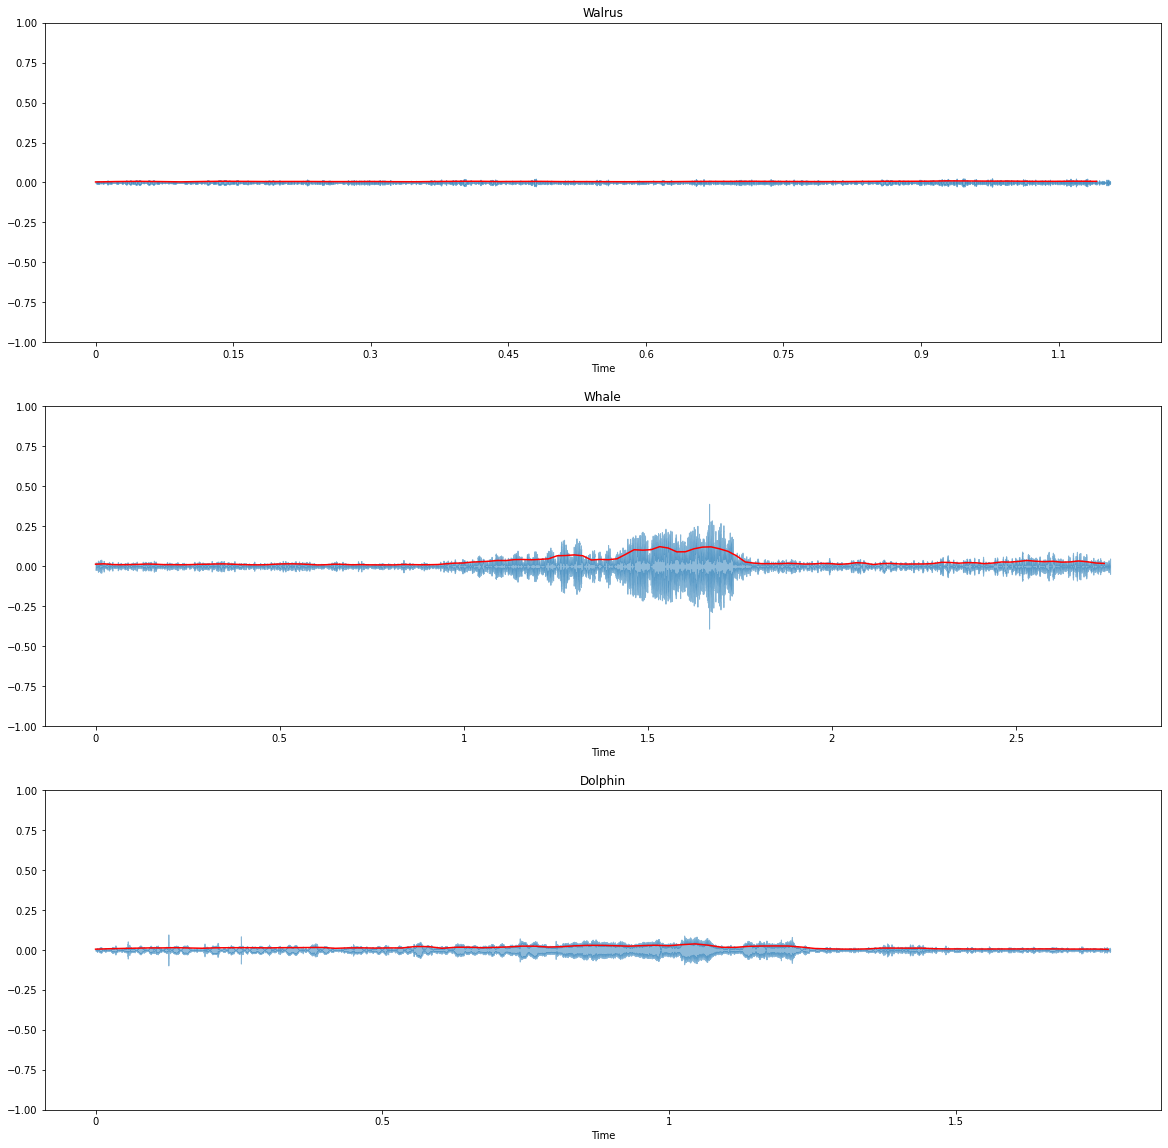

In [10]:
frames1=range(0,rms_walrus.size)
t1=librosa.frames_to_time(frames1,hop_length=HOP_LENGTH)

frames2=range(0,rms_whale.size)
t2=librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)

frames3=range(0,rms_dolphin.size)
t3=librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)



plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
librosa.display.waveshow(walrus, alpha=0.6)
plt.plot(t1,rms_walrus,color='red')
plt.title('Walrus')
plt.ylim((-1,1))

plt.subplot(3,1,2)
plt.plot(t2,rms_whale,color='red')
librosa.display.waveshow(whale, alpha=0.5)
plt.title('Whale')
plt.ylim((-1,1))

plt.subplot(3,1,3)
plt.plot(t3,rms_dolphin,color='red')
librosa.display.waveshow(dolphin, alpha=0.5)
plt.title('Dolphin')
plt.ylim((-1,1))

plt.show()

In [11]:
#ZERO-CROSSING RATE
zcr_walrus=librosa.feature.zero_crossing_rate(y=walrus,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_whale=librosa.feature.zero_crossing_rate(y=whale,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_dolphin=librosa.feature.zero_crossing_rate(y=dolphin,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

In [12]:
print(zcr_dolphin.size)

77


### VISUALISE ZCR OF NOISE PIECES

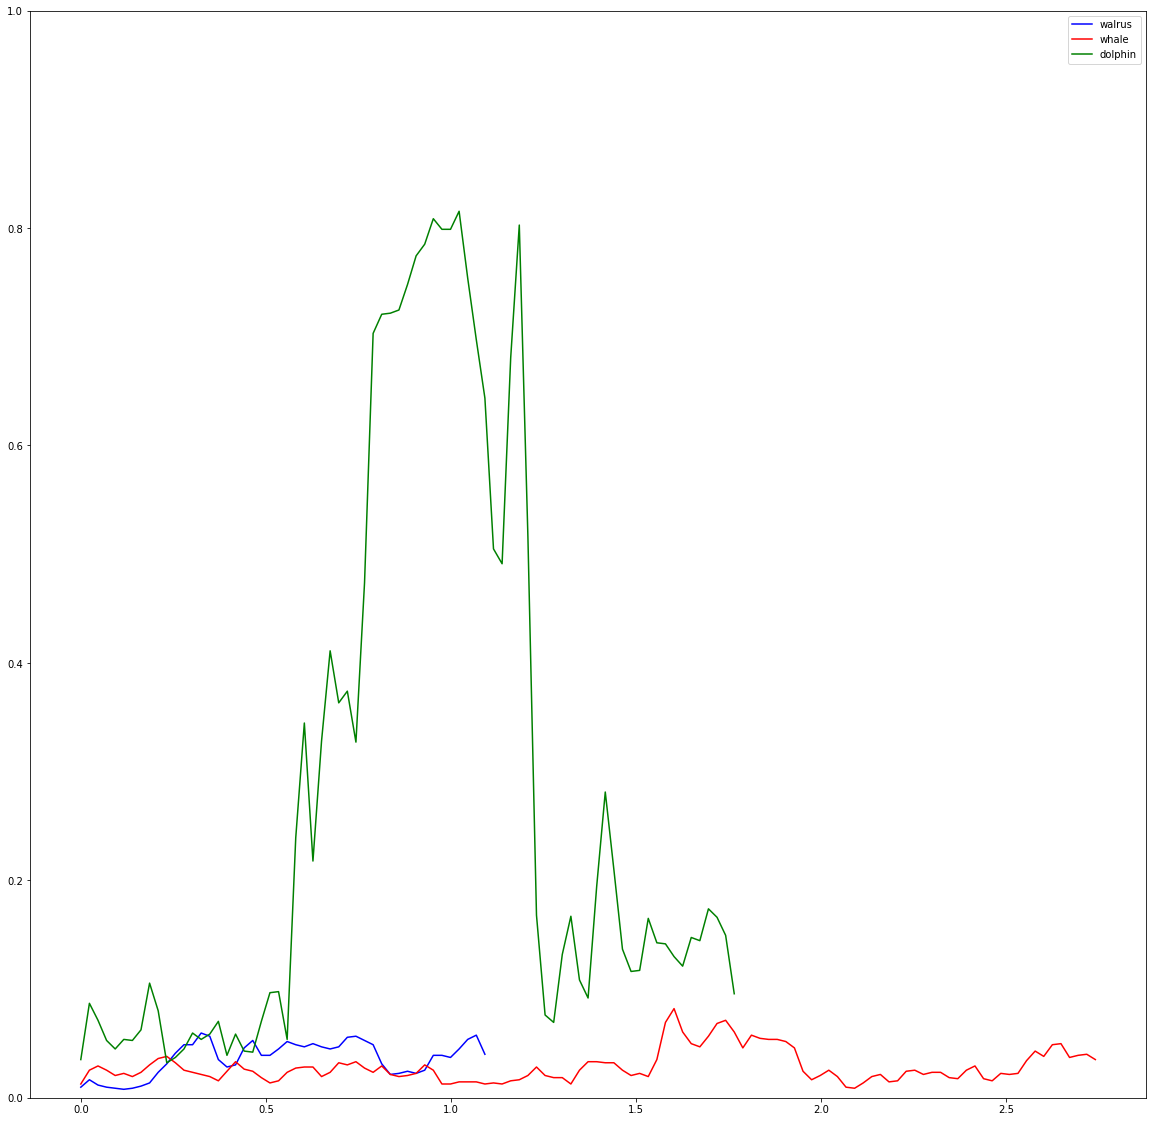

In [13]:

frames1=range(0,rms_walrus.size)
t1=librosa.frames_to_time(frames1,hop_length=HOP_LENGTH)

frames2=range(0,rms_whale.size)
t2=librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)

frames3=range(0,rms_dolphin.size)
t3=librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)

plt.figure(figsize=(20,20))
plt.plot(t1,zcr_walrus,color='b', label='walrus')
plt.plot(t2,zcr_whale,color='r', label='whale')
plt.plot(t3,zcr_dolphin,color='g',label='dolphin')
plt.ylim((0,1))


plt.legend()
plt.show()

### SPECTRAL CENTROID AND PLOT

C:\Users\TUKUNA\AppData\Local\Temp/ipykernel_4244/1366313469.py:3: FutureWarning: Pass y=[ 0.00093676  0.0012001   0.00145999 ... -0.00487454 -0.0034664
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y1=librosa.feature.spectral_centroid(walrus)
C:\Users\TUKUNA\AppData\Local\Temp/ipykernel_4244/1366313469.py:8: FutureWarning: Pass y=[ 0.01434782  0.01735291  0.01950118 ... -0.02166126 -0.01167585
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y2=librosa.feature.spectral_centroid(whale)
C:\Users\TUKUNA\AppData\Local\Temp/ipykernel_4244/1366313469.py:13: FutureWarning: Pass y=[-0.00124344 -0.00294823 -0.00361019 ...  0.00742031  0.0037686
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y3=librosa.feature.spectral_centroid(dolphin)


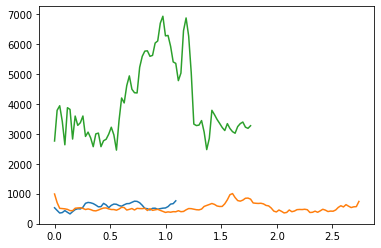

In [14]:
frames1=range(0,rms_walrus.size)
t1=librosa.frames_to_time(frames1,hop_length=HOP_LENGTH)
y1=librosa.feature.spectral_centroid(walrus)
plt.plot(t1,y1.reshape(48,1))

frames2=range(0,rms_whale.size)
t2=librosa.frames_to_time(frames2,hop_length=HOP_LENGTH)
y2=librosa.feature.spectral_centroid(whale)
plt.plot(t2,y2.reshape(119,1))

frames3=range(0,rms_dolphin.size)
t3=librosa.frames_to_time(frames3,hop_length=HOP_LENGTH)
y3=librosa.feature.spectral_centroid(dolphin)
plt.plot(t3,y3.reshape(77,1))
plt.show()

In [15]:
audio_file='ocean_noise_data/bearded_seal/66038001.wav'

In [16]:
ipd.Audio(audio_file)

In [17]:
#waveform
seal_wave,sr = librosa.load(audio_file)
seal_wave

array([ 0.05395766, -0.02969466, -0.0845062 , ...,  0.04735458,
        0.053809  ,  0.        ], dtype=float32)

In [18]:
sr

22050

In [19]:
seal_wave.shape

(86123,)

### SEAL AUDIO WAVEFORM

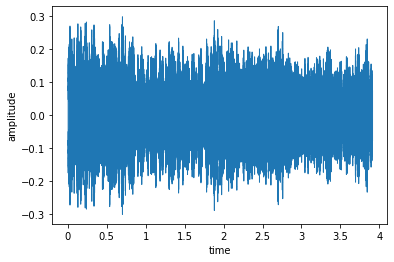

In [20]:
librosa.display.waveshow(seal_wave, sr=sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

### FFT- moving from time domain to frequency domain

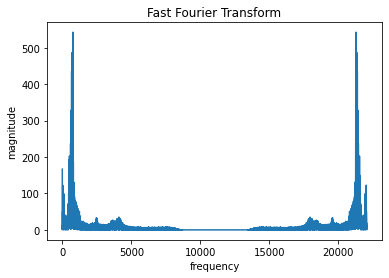

In [21]:
fft=np.fft.fft(seal_wave)
magnitude=np.abs(fft)
frequency=np.linspace(0, sr, len(magnitude))
plt.plot(frequency, magnitude)
plt.title('Fast Fourier Transform')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

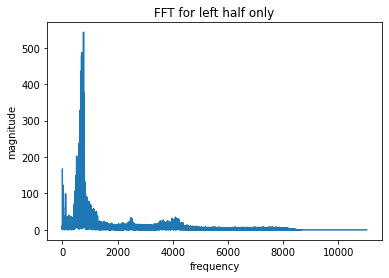

In [22]:
#fft only for the left half of the plot
left_frequency=frequency[:int(len(frequency)/2)]
left_magnitude=magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('FFT for left half only')
plt.show()

### STFT SPECTROGRAM

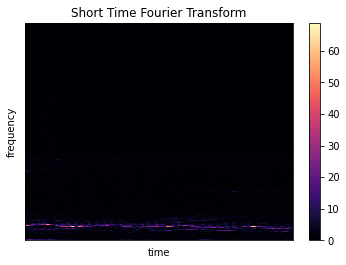

In [23]:
stft=librosa.core.stft(seal_wave, n_fft=2048, hop_length=512)
spectrogram=np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('Short Time Fourier Transform')
plt.colorbar()
plt.show()

### LOG SPECTROGRAM

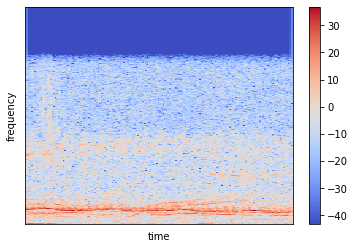

In [24]:
log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

### EXTRACTING MFCCs

*MFCCs are the features which are fed to the neural network*

MFCC- Mel Frequency Cepstral Coefficients

C:\Users\TUKUNA\AppData\Local\Temp/ipykernel_4244/388306600.py:1: FutureWarning: Pass y=[ 0.05395766 -0.02969466 -0.0845062  ...  0.04735458  0.053809
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(seal_wave, n_fft=2048, hop_length=512, n_mfcc=13)


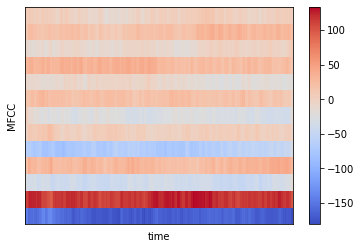

In [25]:
mfcc=librosa.feature.mfcc(seal_wave, n_fft=2048, hop_length=512, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr, hop_length=512)
plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [26]:
DATA_PATH='data.json'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 44, 64)            19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
26/26 [==============================]

Epoch 51/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2967 - accuracy: 0.9331 - val_loss: 0.6107 - val_accuracy: 0.8281
Epoch 52/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2868 - accuracy: 0.9409 - val_loss: 0.5998 - val_accuracy: 0.8281
Epoch 53/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2575 - accuracy: 0.9508 - val_loss: 0.5587 - val_accuracy: 0.8281
Epoch 54/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2443 - accuracy: 0.9547 - val_loss: 0.6295 - val_accuracy: 0.8047
Epoch 55/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2540 - accuracy: 0.9508 - val_loss: 0.5899 - val_accuracy: 0.8281
Epoch 56/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2267 - accuracy: 0.9469 - val_loss: 0.6290 - val_accuracy: 0.8281
Epoch 57/200
26/26 [==============================] - 1s 40ms/step - loss: 0.2233 - accuracy: 0.9646 - val_loss: 0.5749 - val_accuracy: 0.8281

Epoch 165/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1107 - accuracy: 0.9744 - val_loss: 0.6985 - val_accuracy: 0.8594
Epoch 166/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1035 - accuracy: 0.9843 - val_loss: 0.6866 - val_accuracy: 0.8594
Epoch 167/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1107 - accuracy: 0.9803 - val_loss: 0.7022 - val_accuracy: 0.8672
Epoch 168/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1028 - accuracy: 0.9803 - val_loss: 0.6922 - val_accuracy: 0.8594
Epoch 169/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1118 - accuracy: 0.9705 - val_loss: 0.6945 - val_accuracy: 0.8516
Epoch 170/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1040 - accuracy: 0.9764 - val_loss: 0.6911 - val_accuracy: 0.8594
Epoch 171/200
26/26 [==============================] - 1s 40ms/step - loss: 0.1044 - accuracy: 0.9764 - val_loss: 0.6954 - val_accuracy:

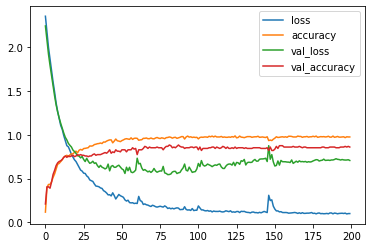

In [29]:
def load_data(data_path):
    
    with open ( data_path , "r" ) as fp :
        data = json.load (fp)
        
    x = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return x , y


def prepare_datasets(test_size,validation_size):
    #load data
    x,y=load_data(DATA_PATH)
    
    #create train/test split
    x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=0)
    
    #create validation/train split
    x_train,x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=validation_size)
    
    
    return  x_train, x_validation, x_test, y_train, y_validation, y_test


def build_model(input_shape):
    #create RNN-LSTM model
    model=keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))
   
    #dense layer
    model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.Dropout(0.2))
    
    #output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model
    
    
def predict(model,x,y):
    
    x=x[np.newaxis,...]
    prediction=model.predict(x)
    
    predicted_index=np.argmax(prediction, axis=1)
    print(f'Expected label:{y}, predicted index: {predicted_index}')

if __name__=='__main__':
    #create train, validation, test sets
    x_train, x_validation, x_test, y_train, y_validation, y_test=prepare_datasets(0.25,0.2)
    
    #build the RNN net
    input_shape=(x_train.shape[1], x_train.shape[2]) #(num of slices or time steps, num of MFCCs)
    model=build_model(input_shape)
    
    #compile
    optimizer=keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    model.summary()
    
    
    #train RNN
    model.fit(x_train,y_train, validation_data=(x_validation,y_validation), batch_size=20, epochs=200)
    model_losses=pd.DataFrame(model.history.history)
    print(model_losses)
    model_losses.plot()
    
    
    #evaluate RNN on test set
    test_error,test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print('accuracy on test set is: {}'.format(test_accuracy))
    
    
    #make prediction 1
    x_predict1=x_test[100]
    y_predict1=y_test[100]
    
    predict(model,x_predict1,y_predict1)
    
    #make prediction 2
    x_predict2=x_test[80]
    y_predict2=y_test[80]
    
    predict(model,x_predict2,y_predict2)
    